In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("C:\\Datasets\\student_performance_dataset.csv")

In [24]:
df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


In [25]:
df.drop("Student_ID",axis=1,inplace=True)

In [26]:
df.head()

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,Male,16,78.222927,73,PhD,No,No,50,Fail
2,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,Female,37,98.655517,63,Masters,No,Yes,70,Pass


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      708 non-null    object 
 1   Study_Hours_per_Week        708 non-null    int64  
 2   Attendance_Rate             708 non-null    float64
 3   Past_Exam_Scores            708 non-null    int64  
 4   Parental_Education_Level    708 non-null    object 
 5   Internet_Access_at_Home     708 non-null    object 
 6   Extracurricular_Activities  708 non-null    object 
 7   Final_Exam_Score            708 non-null    int64  
 8   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 49.9+ KB


In [28]:
df.describe()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
count,708.000000,708.000000,708.000000,708.000000
mean,26.132768,78.107722,77.871469,58.771186
std,8.877727,13.802802,14.402739,6.705877
min,10.000000,50.116970,50.000000,50.000000
25%,19.000000,67.550094,65.000000,52.000000
50%,27.000000,79.363046,79.000000,59.500000
75%,34.000000,89.504232,91.000000,64.000000
max,39.000000,99.967675,100.000000,77.000000


In [29]:
df["Gender"] = df["Gender"].map({"Male":0,"Female":1})

In [30]:
df["Parental_Education_Level"].value_counts()

Parental_Education_Level
Bachelors      189
High School    183
Masters        171
PhD            165
Name: count, dtype: int64

In [31]:
education = pd.get_dummies(df["Parental_Education_Level"]).astype(int)

In [32]:
df = df.join(education)

In [34]:
df.drop("Parental_Education_Level",axis=1,inplace=True)

In [39]:
df.head()

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail,Bachelors,High School,Masters,PhD
0,0,31,68.267841,86,Yes,Yes,63,Pass,0,1,0,0
1,0,16,78.222927,73,No,No,50,Fail,0,0,0,1
2,1,21,87.525096,74,Yes,No,55,Fail,0,0,0,1
3,1,27,92.076483,99,No,No,65,Pass,1,0,0,0
4,1,37,98.655517,63,No,Yes,70,Pass,0,0,1,0


In [40]:
df["Internet_Access_at_Home"] = df["Internet_Access_at_Home"].map({"Yes":1,"No":0})
df["Extracurricular_Activities"] = df["Extracurricular_Activities"].map({"Yes":1,"No":0})

In [42]:
df.drop("Pass_Fail",axis=1,inplace=True)

In [ ]:
corr = df.corr()

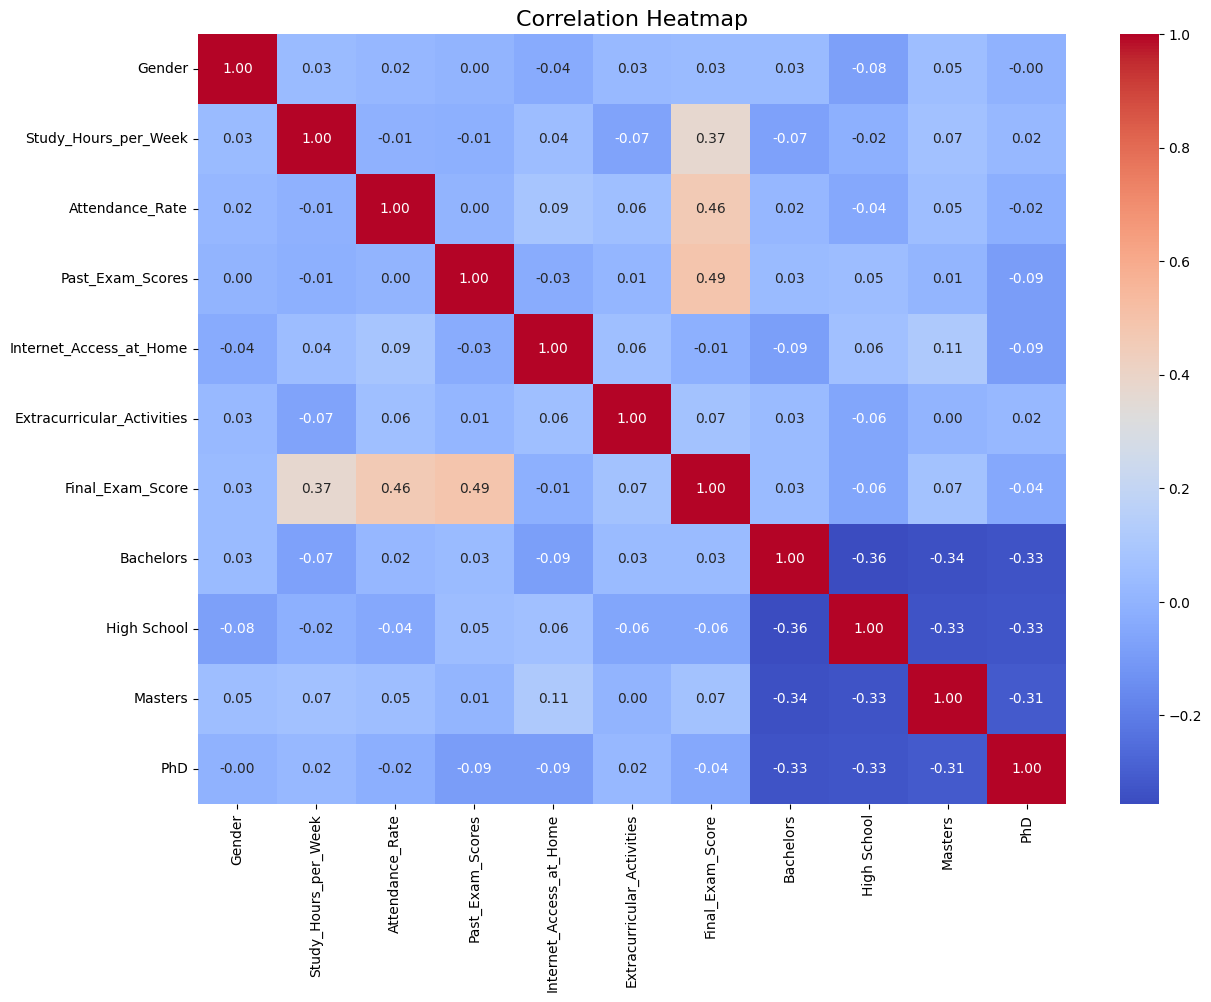

In [45]:
plt.figure(figsize=[14,10])
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [46]:
df.drop("High School",axis=1,inplace=True)

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,root_mean_squared_error,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

In [49]:
X = df.drop("Final_Exam_Score",axis=1)
y= df["Final_Exam_Score"]

In [50]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
model = LinearRegression()

In [52]:
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
y_predict = model.predict(x_test)

In [65]:
print("R2_score",r2_score(y_test,y_predict))
print("Mean Squared Error:", mean_squared_error(y_test, y_predict))
print("RMSE:",root_mean_squared_error(y_test,y_predict))

R2_score 0.6523176522573739
Mean Squared Error: 14.792138932473758
RMSE: 3.8460549830279023


In [59]:
x_test

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Internet_Access_at_Home,Extracurricular_Activities,Bachelors,Masters,PhD
120,1,14,54.335261,61,0,1,1,0,0
247,1,31,87.854060,88,1,0,0,1,0
324,0,35,90.252233,82,1,1,0,0,0
204,1,23,85.702960,98,0,0,1,0,0
603,1,39,89.504232,67,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
41,0,37,81.968068,67,0,1,1,0,0
108,0,19,96.600717,54,0,0,1,0,0
582,0,12,93.175907,66,0,0,0,0,1
56,0,10,91.256634,85,1,1,1,0,0


In [ ]:
model.predict([[0,31,68.267841,86,1,1,0,0,0]])

c:\Juypter notebook\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([59.14766654])

In [66]:
import joblib
joblib.dump(model, "Student_academic_performance.joblib")

['Student_academic_performance.joblib']